Importando Bibliotecas

In [74]:
import pandas_datareader.data as web
import datetime as dt
import time

import numpy as np
import matplotlib.mlab as m
import random as r
import matplotlib.pyplot as fig
import math 

Lendo os arquivos

In [82]:
hoje = str(dt.date.today()) #Pega a data de hoje

#Pega o último ano
#inicio = dt.datetime(int(hoje[0:4])-1,int(hoje[5:7]),int(hoje[8:10])) #Data inicio dos dados que iremos coletar
#fim = dt.datetime(int(hoje[0:4]),int(hoje[5:7]),int(hoje[8:10])) #Data final dos dados que iremos coletar

inicio = dt.datetime(2020,3, 20)
fim = dt.datetime(2020,12, 30)
y = web.DataReader('^BVSP', 'yahoo', inicio, fim) #Carrega os dados em um data frame

print(y.head())

               High      Low     Open    Close    Volume  Adj Close
Date                                                               
2020-03-20  72247.0  66120.0  68344.0  67069.0  15152400    67069.0
2020-03-23  67604.0  62161.0  67067.0  63570.0  11962200    63570.0
2020-03-24  71535.0  63604.0  63604.0  69729.0  11679900    69729.0
2020-03-25  76714.0  69360.0  69727.0  74956.0  12951100    74956.0
2020-03-26  78846.0  74923.0  74956.0  77710.0  12758000    77710.0


Faz a regressão linear, e calcula o residuo

Text(0.5, 1.0, 'IBOV + Regressão ')

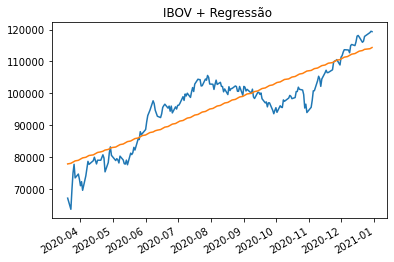

In [89]:
lin = len(y.Close) #Número de linhas
delta = m.detrend_linear(y['Close']) #Residuo

x = np.linspace(1, lin, lin) #Inicializa o array
coef = np.polyfit(x, y.Close, 1) #Pega os coeficientes da regressão

linhaTend = x * coef[0] + coef[1] #Cria a linha de tendência

y["Linha Tendencia"] = linhaTend


#fig.plot(linhaTend,'--k')
fig.plot(y.Close)
fig.plot(y["Linha Tendencia"])
fig.gcf().autofmt_xdate()
fig.title('IBOV + Regressão ')

Faz uma simulação de Monte Carlo

In [91]:
monteCarlo = []

reta = 0
aleat = 0
sm = 0

for i in range(100):
    monteCarlo.append([])

for z in range(lin):
    for i in range(100):
        reta = (z+1) * coef[0] + coef[1]
        aleat = r.random()  #Gera um valor aleatório entr 0 e 1 (Uniforme)
        sm = reta + ((-2*desvio)+(4*desvio*aleat))
        monteCarlo[i].append(sm)

Estatisticas com a simulação

In [92]:
length = len(monteCarlo)
lastDados = np.zeros(length)

for i in range(100):
    lastDados[i] = monteCarlo[i][lin-1]

Media = lastDados.mean()
Desvio = lastDados.std()

Otimista = Media + (2 * Desvio / math.sqrt(length))
Pessimista = Media - (2 * Desvio / math.sqrt(length))

print("\n\n================Estatisticas Monte Carlo================\n")
print('Média      %8.2f' % Media)
print('Desvio     %8.2f' %  Desvio)
print('Otimista   %8.2f' % Otimista)
print('Pessimista %8.2f' % Pessimista)



================Estatisticas Monte Carlo================

Média      113889.69
Desvio      3404.69
Otimista   114570.62
Pessimista 113208.75
